# SUPPORT VECTOR MACHINE

A	Support	Vector	Machine	(SVM)	is	a	very	powerful	and	versatile	Machine	Learning	model,	capable	of performing	linear	or	nonlinear	classification,	regression,	and	even	outlier	detection.

# Linear	SVM	Classification 

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "C:\\Users\\91949\\Desktop\\data science"
CHAPTER_ID = "SVM"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

In [3]:
iris=datasets.load_iris()
x=iris['data'][:,(2,3)]#petal lengh, petal width
y=iris['target']
setosa_or_versicolor=(y==0)|(y==1)

In [4]:
x=x[setosa_or_versicolor]

In [5]:
y=y[setosa_or_versicolor]

In [6]:
y.shape

(100,)

In [7]:
#svm classifier
svm_clf=SVC(kernel='linear',C=float('inf'))
svm_clf.fit(x,y)

SVC(C=inf, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Saving figure large_margin_classification_plot


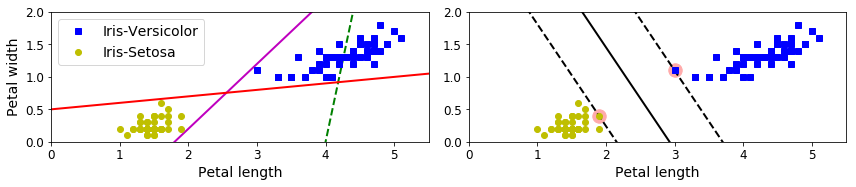

In [8]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "bs")
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

The	two	classes	can	clearly	be	separated	easily with	a	straight	line	(they	are	linearly	separable).	The	left	plot	shows	the	decision	boundaries	of	three possible	linear	classifiers.	The	model	whose	decision	boundary	is	represented	by	the	dashed	line	is	so bad	that	it	does	not	even	separate	the	classes	properly.	The	other	two	models	work	perfectly	on	this training	set,	but	their	decision	boundaries	come	so	close	to	the	instances	that	these	models	will	probably not	perform	as	well	on	new	instances.	In	contrast,	the	solid	line	in	the	plot	on	the	right	represents	the decision	boundary	of	an	SVM	classifier;	this	line	not	only	separates	the	two	classes	but	also	stays	as	far away	from	the	closest	training	instances	as	possible.	You	can	think	of	an	SVM	classifier	as	fitting	the widest	possible	street	(represented	by	the	parallel	dashed	lines)	between	the	classes.	This	is	called	""large margin	classification.""


Notice	that	adding	more	training	instances	“off	the	street”	will	not	affect	the	decision	boundary	at	all:	it	is fully	determined	(or	“supported”)	by	the	instances	located	on	the	edge	of	the	street.	These	instances	are called	the	support	vectors

# SENSITIVITY TO FEATURE SCALES

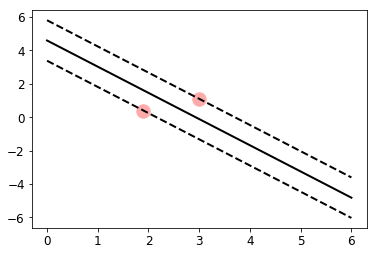

In [9]:
plot_svc_decision_boundary(svm_clf, 0, 6)



Saving figure sensitivity_to_feature_scales_plot


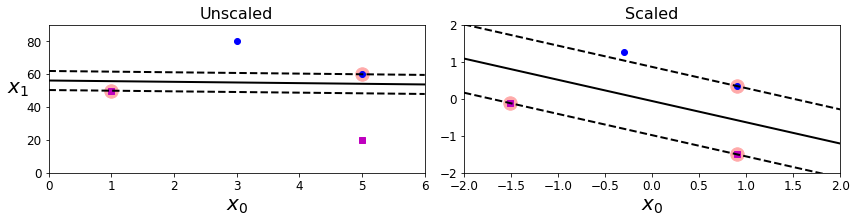

In [10]:
xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(xs, ys)

plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(xs[:, 0][ys==1], xs[:, 1][ys==1], "bo")
plt.plot(xs[:, 0][ys==0], xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(xs)
svm_clf.fit(x_scaled, ys)

plt.subplot(122)
plt.plot(x_scaled[:, 0][ys==1], x_scaled[:, 1][ys==1], "bo")
plt.plot(x_scaled[:, 0][ys==0], x_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

SVMs	are	sensitive	to	the	feature	scales,	as	you	can	see	in	 above Figure	on	the	left	plot,	the	vertical	scale	is	much	larger	than	the horizontal	scale,	so	the	widest	possible	street	is	close	to	horizontal.	After	feature	scaling	(e.g.,	using	Scikit-Learn’s StandardScaler),	the	decision	boundary	looks	much	better	(on	the	right	plot).

# Sensitivity to outliers

In [11]:
# first create outliers
x_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

In [12]:
#adding outliers to the data in x and y
xo1 = np.concatenate([x, x_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
xo2 = np.concatenate([x, x_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)


now we have outliers in data, we need to find them

In [13]:
svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(xo2, yo2)


SVC(C=1000000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Saving figure sensitivity_to_outliers_plot


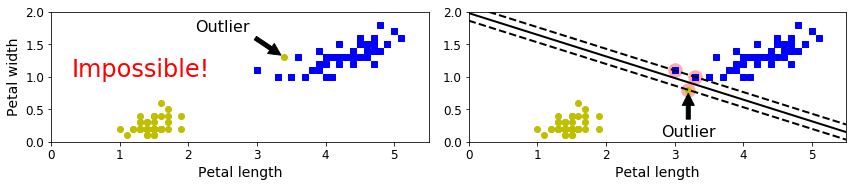

In [14]:
# wit out using svm
plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(xo1[:, 0][yo1==1], xo1[:, 1][yo1==1], "bs")
plt.plot(xo1[:, 0][yo1==0], xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(x_outliers[0][0], x_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

# using svm
plt.subplot(122)
plt.plot(xo2[:, 0][yo2==1], xo2[:, 1][yo2==1], "bs")
plt.plot(xo2[:, 0][yo2==0], xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(x_outliers[1][0], x_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

to avoid these pblms it is preferable to use more flexible model. the objective is to find a good balance between keeping the streets as large as posible and limiting margain violations. this is called soft margain classification

# Large margin vs margin violations

In [15]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
x = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(x, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [16]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [17]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(x, y)
scaled_svm_clf2.fit(x, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=100, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

In [18]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (x.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (x.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = x[support_vectors_idx1]
svm_clf2.support_vectors_ = x[support_vectors_idx2]

Saving figure regularization_plot


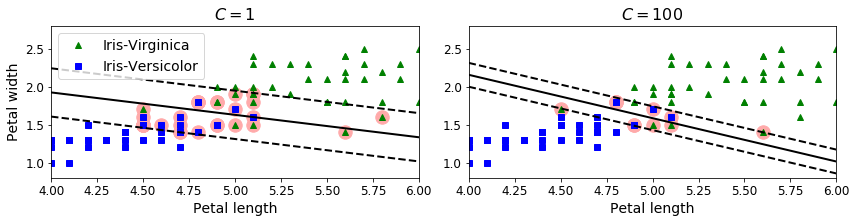

In [19]:
plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(x[:, 0][y==1], x[:, 1][y==1], "g^")
plt.plot(x[:, 0][y==0], x[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

save_fig("regularization_plot")

If	your	SVM	model	is	overfitting,	you	can	try	regularizing	it	by	reducing	C.

The	LinearSVC	class	regularizes	the	bias	term,	so	you	should	center	the	training	set	first	by	subtracting	its	mean.	This	is automatic	if	you	scale	the	data	using	the	StandardScaler.	Moreover,	make	sure	you	set	the	loss	hyperparameter	to	"hinge",	as it	is	not	the	default	value.	Finally,	for	better	performance	you	should	set	the	dual	hyperparameter	to	False,	unless	there	are	more features	than	training	instances	

# Nonlinear	SVM	Classification 

Although	linear	SVM	classifiers	are	efficient	and	work	surprisingly	well	in	many	cases,	many	datasets are	not	even	close	to	being	linearly	separable.	One	approach	to	handling	nonlinear	datasets	is	to	add	more features,	such	as	polynomial	features

Saving figure higher_dimensions_plot


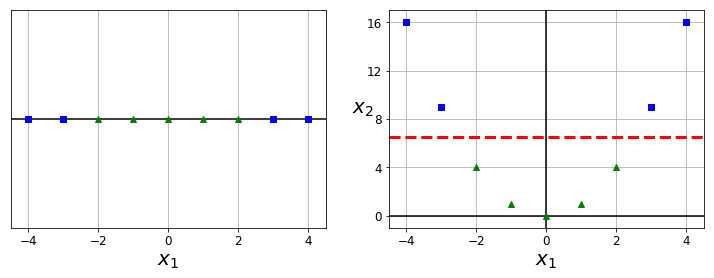

In [20]:
x1D = np.linspace(-4, 4, 9).reshape(-1, 1)
x2D = np.c_[x1D, x1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(x1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(x1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(x2D[:, 0][y==0], x2D[:, 1][y==0], "bs")
plt.plot(x2D[:, 0][y==1], x2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

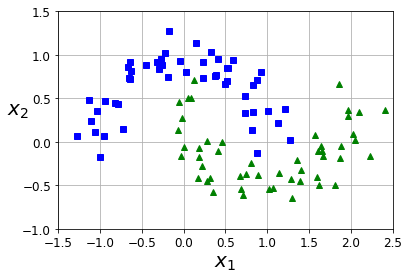

In [21]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y==0], x[:, 1][y==0], "bs")
    plt.plot(x[:, 0][y==1], x[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [22]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge",random_state=42))
    ])

polynomial_svm_clf.fit(x, y)

C:\Users\91949\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(memory=None,
     steps=[('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=42, tol=0.0001, verbose=0))])

Saving figure moons_polynomial_svc_plot


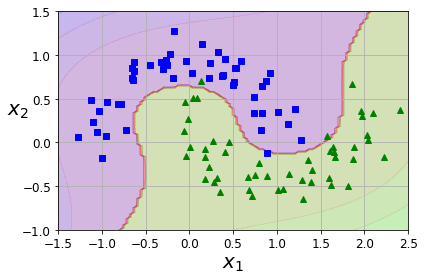

In [23]:
#create a function to plot
def plot_predictions(clf,axes):
    x0s=np.linspace(axes[0],axes[1],100)
    x1s=np.linspace(axes[2],axes[3],100)
    x0,x1=np.meshgrid(x0s,x1s)
    x=np.c_[x0.ravel(),x1.ravel()]
    y_pred=clf.predict(x).reshape(x0.shape)
    y_decision=clf.decision_function(x).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
   
    
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()


# Polynomial	Kernel

Adding	polynomial	features	is	simple	to	implement	and	can	work	great	with	all	sorts	of	Machine	Learning algorithms	(not	just	SVMs),	but	at	a	low	polynomial	degree	it	cannot	deal	with	very	complex	datasets, and	with	a	high	polynomial	degree	it	creates	a	huge	number	of	features,	making	the	model	too	slow.

Fortunately,	when	using	SVMs	you	can	apply	an	almost	miraculous	mathematical	technique	called	the kernel	trick	(it	is	explained	in	a	moment).	It	makes	it	possible	to	get	the	same	result	as	if	you	added	many polynomial	features,	even	with	very	high-degree	polynomials,	without	actually	having	to	add	them.	So there	is	no	combinatorial	explosion	of	the	number	of	features	since	you	don’t	actually	add	any	features. This	trick	is	implemented	by	the	SVC	class.	

In [24]:
#This code trains an SVM classifier using a 3rd-degree polynomial kernel
from sklearn.svm import SVC
poly_kernel_svm_clf=Pipeline((('scaler',StandardScaler()),('svm_clf',SVC(kernel='poly',degree=3,coef0=1,C=5))))
poly_kernel_svm_clf.fit(x,y)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=1,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

In [25]:
#this code trains a SVM classifier using a 100 degree polynomial kernel
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(x, y)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=5, cache_size=200, class_weight=None, coef0=100,
  decision_function_shape='ovr', degree=10, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))])

Saving figure moons_kernelized_polynomial_svc_plot


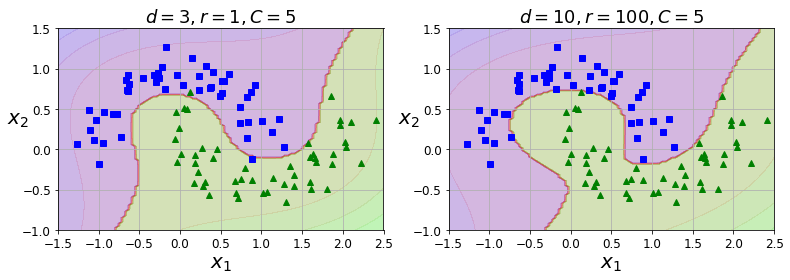

In [26]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

This	code	trains	an	SVM	classifier	using	a	3rd-degree	polynomial	kernel.	It	is	represented	on	the	left	of Figure	5-7.	On	the	right	is	another	SVM	classifier	using	a	10th-degree	polynomial	kernel.	Obviously,	if your	model	is	overfitting,	you	might	want	to	reduce	the	polynomial	degree.	Conversely,	if	it	is underfitting,	you	can	try	increasing	it.	The	hyperparameter	coef0	controls	how	much	the	model	is influenced	by	high-degree	polynomials	versus	low-degree	polynomials.


A	common	approach	to	find	the	right	hyperparameter	values	is	to	use	grid	search	(see	Chapter	2).	It	is	often	faster	to	first	do	a very	coarse	grid	search,	then	a	finer	grid	search	around	the	best	values	found.	Having	a	good	sense	of	what	each hyperparameter	actually	does	can	also	help	you	search	in	the	right	part	of	the	hyperparameter	space.

#  Adding	Similarity	Features

Another	technique	to	tackle	nonlinear	problems	is	to	add	features	computed	using	a	similarity	function that	measures	how	much	each	instance	resembles	a	particular	landmark.	For	example,	let’s	take	the	onedimensional	dataset	discussed	earlier	and	add	two	landmarks	to	it	at	x1	=	–2	and	x1	=	1	(see	the	left	plot in	Figure	5-8).	Next,	let’s	define	the	similarity	function	to	be	the	Gaussian	Radial	Basis	Function	(RBF) with	γ	=	0.3.


gaussian radial basis function(x,l)= exp( -γ ||x-l||**2)

Saving figure kernel_method_plot


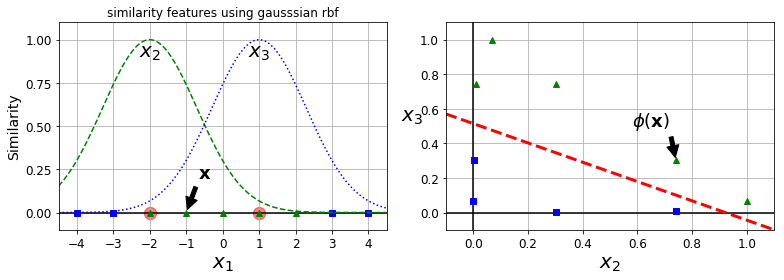

In [40]:
#creating gaussian rbf function which used to know how much each instance resembles a particular model(similarity function)
def gaussian_rbf(x,landmark,gamma):
    return np.exp(-gamma*np.linalg.norm(x-landmark,axis=1)**2)
gamma=0.3
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)
xk= np.c_[gaussian_rbf(x1D, -2, gamma), gaussian_rbf(x1D, 1, gamma)]
#xk=np.c_[x2s,x3s]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(x1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(x1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(x1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])
plt.title('similarity features using gausssian rbf')
plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(xk[:, 0][yk==0], xk[:, 1][yk==0], "bs")
plt.plot(xk[:, 0][yk==1], xk[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(xk[3, 0], xk[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
save_fig("kernel_method_plot")
plt.show()



It	is	a	bell-shaped	function	varying	from	0	(very	far	away	from	the	landmark)	to	1	(at	the	landmark).	Now we	are	ready	to	compute	the	new	features.	For	example,	let’s	look	at	the	instance	x1	=	–1:	it	is	located	at	a distance	of	1	from	the	first	landmark,	and	2	from	the	second	landmark.	Therefore	its	new	features	are	x2	= exp	(–0.3	×	12)	≈	0.74	and	x3	=	exp	(–0.3	×	22)	≈	0.30.	The	plot	on	the	right	of	Figure	5-8	shows	the transformed	dataset	(dropping	the	original	features).	As	you	can	see,	it	is	now	linearly	separable.


You	may	wonder	how	to	select	the	landmarks.	The	simplest	approach	is	to	create	a	landmark	at	the location	of	each	and	every	instance	in	the	dataset.	This	creates	many	dimensions	and	thus	increases	the chances	that	the	transformed	training	set	will	be	linearly	separable.	The	downside	is	that	a	training	set with	m	instances	and	n	features	gets	transformed	into	a	training	set	with	m	instances	and	m	features (assuming	you	drop	the	original	features).	If	your	training	set	is	very	large,	you	end	up	with	an	equally large	number	of	features

# Gaussian	RBF	Kernel

Just	like	the	polynomial	features	method,	the	similarity	features	method	can	be	useful	with	any	Machine Learning	algorithm,	but	it	may	be	computationally	expensive	to	compute	all	the	additional	features, especially	on	large	training	sets.	However,	once	again	the	kernel	trick	does	its	SVM	magic:	it	makes	it possible	to	obtain	a	similar	result	as	if	you	had	added	many	similarity	features,	without	actually	having	to add	them.	

In [ ]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(x, y)

In [ ]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(x, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)

save_fig("moons_rbf_svc_plot")
plt.show()



This	model	is	represented	on	the	bottom	left	of	previous Figure.	The	other	plots	show	models	trained	with different	values	of	hyperparameters	gamma	(γ)	and	C.	Increasing	gamma	makes	the	bell-shape	curve narrower	(),	and	as	a	result	each	instance’s	range	of	influence	is	smaller:	the decision	boundary	ends	up	being	more	irregular,	wiggling	around	individual	instances.	Conversely,	a small	gamma	value	makes	the	bell-shaped	curve	wider,	so	instances	have	a	larger	range	of	influence,	and the	decision	boundary	ends	up	smoother.	So	γ	acts	like	a	regularization	hyperparameter:	if	your	model	is overfitting,	you	should	reduce	it,	and	if	it	is	underfitting,	you	should	increase	it	(similar	to	the	C hyperparameter).

"""With	so	many	kernels	to	choose	from,	how	can	you	decide	which	one	to	use?	As	a	rule	of	thumb,	you	should	always	try	the	linear kernel	first	(remember	that	LinearSVC	is	much	faster	than	SVC(kernel="linear")),	especially	if	the	training	set	is	very	large	or if	it	has	plenty	of	features.	If	the	training	set	is	not	too	large,	you	should	try	the	Gaussian	RBF	kernel	as	well;	it	works	well	in most	cases.	Then	if	you	have	spare	time	and	computing	power,	you	can	also	experiment	with	a	few	other	kernels	using	crossvalidation	and	grid	search,	especially	if	there	are	kernels	specialized	for	your	training	set’s	data	structure."""""

# Computational	Complexity

1.The	LinearSVC	class	is	based	on	the	liblinear	library,	which	implements	an	optimized	algorithm	for linear	SVMs.1	It	does	not	support	the	kernel	trick,	but	it	scales	almost	linearly	with	the	number	of	training instances	and	the	number	of	features:	its	training	time	complexity	is	roughly	O(m	×	n). 

2.The	algorithm	takes	longer	if	you	require	a	very	high	precision.	This	is	controlled	by	the	tolerance hyperparameter	ϵ	(called	tol	in	Scikit-Learn).	In	most	classification	tasks,	the	default	tolerance	is	fine. 

3.The	SVC	class	is	based	on	the	libsvm	library,	which	implements	an	algorithm	that	supports	the	kernel trick.2	The	training	time	complexity	is	usually	between	O(m2	×	n)	and	O(m3	×	n).	Unfortunately,	this means	that	it	gets	dreadfully	slow	when	the	number	of	training	instances	gets	large	(e.g.,	hundreds	of thousands	of	instances).	This	algorithm	is	perfect	for	complex	but	small	or	medium	training	sets. However,	it	scales	well	with	the	number	of	features,	especially	with	sparse	features	(i.e.,	when	each instance	has	few	nonzero	features).	In	this	case,	the	algorithm	scales	roughly	with	the	average	number	of nonzero	features	per	instance.	

# SVM	Regression 

As	we	mentioned	earlier,	the	SVM	algorithm	is	quite	versatile:	not	only	does	it	support	linear	and nonlinear	classification,	but	it	also	supports	linear	and	nonlinear	regression.	The	trick	is	to	reverse	the objective:	instead	of	trying	to	fit	the	largest	possible	street	between	two	classes	while	limiting	margin violations,	SVM	Regression	tries	to	fit	as	many	instances	as	possible	on	the	street	while	limiting	margin violations	(i.e.,	instances	off	the	street).	The	width	of	the	street	is	controlled	by	a	hyperparameter	ϵ. Figure	5-10	shows	two	linear	SVM	Regression	models	trained	on	some	random	linear	data,	one	with	a large	margin	(ϵ	=	1.5)	and	the	other	with	a	small	margin	(ϵ	=	0.5).


In [28]:
#just create a x and y
np.random.seed(42)
m = 50
x= 2 * np.random.rand(m, 1)
y = (4 + 3 * x + np.random.randn(m, 1)).ravel()

In [29]:
#calling linear svr
from sklearn.svm import LinearSVR
svm_reg1=LinearSVR(epsilon=1.5)
svm_reg2=LinearSVR(epsilon=0.5)
#training the model
svm_reg1.fit(x,y)
svm_reg2.fit(x,y)

LinearSVR(C=1.0, dual=True, epsilon=0.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [50]:
# create a function to find support vector using regressor and data
def find_support_vectors(svm_reg, x, y):
    #lets find the predicted data
    y_pred = svm_reg.predict(x)
    # find the data which is going off margin(so off margin data points has to be the values grater than the epsilon)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

In [54]:
svm_reg1.support_ = find_support_vectors(svm_reg1, x, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, x, y)
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])


Saving figure svm_regression_plot


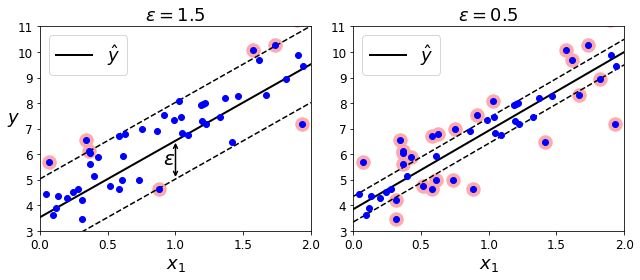

In [79]:
def plot_svm_regression(svm_reg, x, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    #preding values for x1s
    y_pred = svm_reg.predict(x1s)
    #plotting data x1s and y_pred
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    #plotting data x1s and y_pred+svm.reg.epsilon (to plot line )
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(x[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(x, y, 'bo')
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_reg1, x, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, x, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()


Adding	more	training	instances	within	the	margin	does	not	affect	the	model’s	predictions;	thus,	the	model is	said	to	be	ϵ-insensitive. 

# non-linear regression 

To	tackle	nonlinear	regression	tasks,	you	can	use	a	kernelized	SVM	model.	For	example,	Figure	5-11 shows	SVM	Regression	on	a	random	quadratic	training	set,	using	a	2nd-degree	polynomial	kernel.	There is	little	regularization	on	the	left	plot	(i.e.,	a	large	C	value),	and	much	more	regularization	on	the	right	plot (i.e.,	a	small	C	value).

In [88]:
np.random.seed(42)
m = 50
x= 2 * np.random.rand(m, 1)-1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.randn(m, 1)/10).ravel()

In [89]:
#calling linear svr
from sklearn.svm import SVR
svm_poly_reg1=SVR(kernel='poly',degree=2,C=100,epsilon=0.1,gamma='auto')
svm_poly_reg2=SVR(kernel='poly',degree=2,C=0.01,epsilon=0.1,gamma='auto')
#training the model
svm_poly_reg1.fit(x,y)
svm_poly_reg2.fit(x,y)

SVR(C=0.01, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='auto',
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Saving figure svm_with_polynomial_kernel_plot


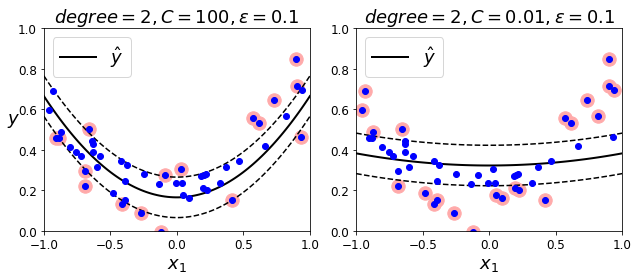

In [90]:
plt.figure(figsize=(9, 4))
plt.subplot(121)
plot_svm_regression(svm_poly_reg1, x, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.subplot(122)
plot_svm_regression(svm_poly_reg2, x, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

The	SVR	class	is	the	regression	equivalent	of	the	SVC	class,	and the	LinearSVR	class	is	the	regression	equivalent	of	the	LinearSVC	class.	The	LinearSVR	class	scales linearly	with	the	size	of	the	training	set	(just	like	the	LinearSVC	class),	while	the	SVR	class	gets	much	too slow	when	the	training	set	grows	large	(just	like	the	SVC	class).


SVMs	can	also	be	used	for	outlier	detection

# Under	the	Hood

we	used	the	convention	of	putting	all	the	model	parameters	in one	vector	θ,	including	the	bias	term	θ0	and	the	input	feature	weights	θ1	to	θn,	and	adding	a	bias	input	x0	= 1	to	all	instances.	In	this	chapter,	we	will	use	a	different	convention,	which	is	more	convenient	(and	more common)	when	you	are	dealing	with	SVMs:	the	bias	term	will	be	called	b	and	the	feature	weights	vector will	be	called	w.	No	bias	feature	will	be	added	to	the	input	feature	vectors.

In [91]:
iris = datasets.load_iris()
x = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

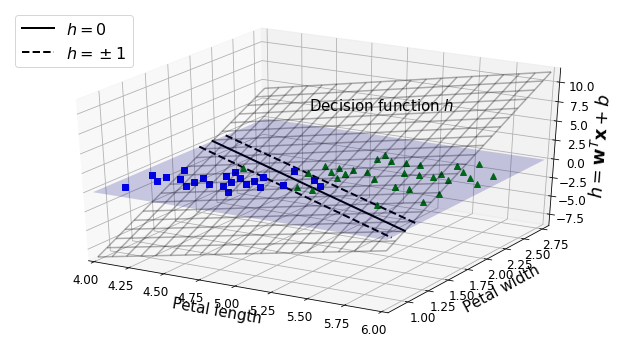

In [99]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (x[:, 0] > x1_lim[0]) & (x[:, 0] < x1_lim[1])
    x_crop = x[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]
    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(x_crop[:, 0][y_crop==1], x_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(x_crop[:, 0][y_crop==0], x_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=15)
    ax.set_xlabel(r"Petal length", fontsize=15)
    ax.set_ylabel(r"Petal width", fontsize=15)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

#save_fig("iris_3D_plot")
plt.show()
